# House Price Prediction using Machine Learning in Python

### Imports and Loading Dataset:

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#For Warnings- 

import warnings
warnings.filterwarnings('ignore')

In [31]:
#Reading Dataset-

data = pd.read_csv('E:/House.csv')

### Understanding Dataset:

In [32]:
print(data)

        Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0        0          60       RL     8450    Inside     1Fam            5   
1        1          20       RL     9600       FR2     1Fam            8   
2        2          60       RL    11250    Inside     1Fam            5   
3        3          70       RL     9550    Corner     1Fam            5   
4        4          60       RL    14260       FR2     1Fam            5   
...    ...         ...      ...      ...       ...      ...          ...   
2914  2914         160       RM     1936    Inside    Twnhs            7   
2915  2915         160       RM     1894    Inside   TwnhsE            5   
2916  2916          20       RL    20000    Inside     1Fam            7   
2917  2917          85       RL    10441    Inside     1Fam            5   
2918  2918          60       RL     9627    Inside     1Fam            5   

      YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0      

In [33]:
#Checking top 5 records-

data.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [34]:
#Checking last 5 records-

data.tail()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN
2918,2918,60,RL,9627,Inside,1Fam,5,1993,1994,HdBoard,0.0,996.0,NaN


#### Termology:

#### Id: To count the records.
#### MSSubClass: The building class
#### MSZoning: The general zoning classification
#### LotArea: Lot size in square feet
#### LotConfig: Lot configuration
#### BldgType: Type of dwelling
#### OverallCond: Overall condition rating
#### YearBuilt: Original construction date
#### YearRemodAdd: Remodel date
#### Exterior1st: Exterior covering on house
#### BsmtFinSF2: Type 2 finished square feet
#### TotalBsmtSF: Total square feet of basement area
#### SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

In [35]:
print('Number of Observations:',data.shape[0])

Number of Observations: 2919


In [36]:
list(data.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'LotConfig',
 'BldgType',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'Exterior1st',
 'BsmtFinSF2',
 'TotalBsmtSF',
 'SalePrice']

In [37]:
data.value_counts()

Id    MSSubClass  MSZoning  LotArea  LotConfig  BldgType  OverallCond  YearBuilt  YearRemodAdd  Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice
0     60          RL        8450     Inside     1Fam      5            2003       2003          VinylSd      0.0         856.0        208500.0     1
981   60          RL        12203    Corner     1Fam      5            1998       1999          VinylSd      0.0         1225.0       336000.0     1
979   20          RL        8816     Corner     1Fam      6            1963       1963          VinylSd      0.0         1121.0       139000.0     1
978   20          RL        9450     Inside     1Fam      5            1954       1954          MetalSd      0.0         894.0        110000.0     1
977   120         FV        4274     Inside     TwnhsE    5            2006       2007          VinylSd      0.0         1241.0       199900.0     1
                                                                                                               

In [38]:
#We categorize the features depending on their datatype (int, float, object) and then calculate the number of them-

obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 3


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [40]:
data.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


### Data Cleaning:

In [41]:
data.drop(['Id'],
             axis=1,
             inplace=True)

In [42]:
data.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


### Missing Values:

In [43]:
data.isnull().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [44]:
missing_values = [col for col in data.columns if data[col].isnull().any()]

In [45]:
for col in data.columns:
    missing_percentage = round(data[col].isnull().mean() * 100, 3)
    print(col, missing_percentage, '% missing values')

MSSubClass 0.0 % missing values
MSZoning 0.137 % missing values
LotArea 0.0 % missing values
LotConfig 0.0 % missing values
BldgType 0.0 % missing values
OverallCond 0.0 % missing values
YearBuilt 0.0 % missing values
YearRemodAdd 0.0 % missing values
Exterior1st 0.034 % missing values
BsmtFinSF2 0.034 % missing values
TotalBsmtSF 0.034 % missing values
SalePrice 49.983 % missing values


In [46]:
#First we create a list of missing values by each feature-

temp = list(data.isna().sum())

#Then we create a list of columns and their missing values as inner list to a separate list-

lst= []
i=0
for col in data.columns:
    insert_lst = [col,temp[i]]
    lst.append(insert_lst)
    i+=1

#Finally create a dataframe-

temp_df = pd.DataFrame(data=lst,columns=['Column_Name','Missing_Values'])

In [47]:
import plotly.express as px

fig = px.bar(temp_df.sort_values(by='Missing_Values'),x='Missing_Values',y='Column_Name',
             orientation='h',height=1500,width=900,color='Missing_Values',text='Missing_Values',
             title='Missing values in train dataset')

fig.update_traces(textposition='outside')
fig.show()

In [48]:
#The following columns have missing values-

temp_df[temp_df['Missing_Values']>0].sort_values(by='Missing_Values',
                                                 ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')

,Column_Name,Missing_Values
0,SalePrice,1459
1,MSZoning,4
2,Exterior1st,1
3,BsmtFinSF2,1
4,TotalBsmtSF,1


### Duplicates:

In [49]:
data.duplicated().sum()

8

In [50]:
#Seeing Duplicates -

data[data.duplicated()]

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
1858,90,RL,7018,Inside,Duplex,5,1979,1979,HdBoard,0.0,0.0,NaN
1961,160,RM,1680,Inside,Twnhs,5,1973,1973,HdBoard,0.0,483.0,NaN
1982,120,RL,6240,Inside,TwnhsE,5,2006,2007,MetalSd,0.0,1342.0,NaN
2220,120,RM,3843,Inside,TwnhsE,5,2007,2008,CemntBd,0.0,1596.0,NaN
2369,160,FV,2280,Inside,Twnhs,5,1999,1999,MetalSd,0.0,744.0,NaN
2714,160,FV,2998,Inside,TwnhsE,5,2000,2000,MetalSd,0.0,756.0,NaN
2853,120,RM,4435,Inside,TwnhsE,5,2003,2003,VinylSd,0.0,848.0,NaN
2864,180,RM,3675,Inside,TwnhsE,5,2005,2006,VinylSd,0.0,547.0,NaN


In [51]:
#Removing Dulpicates -

data.drop_duplicates(inplace = True)

In [52]:
data.shape

(2911, 12)

### Skewness:

In [53]:
data.skew()

MSSubClass       1.387193
LotArea         12.841306
OverallCond      0.566606
YearBuilt       -0.597052
YearRemodAdd    -0.448789
BsmtFinSF2       4.140893
TotalBsmtSF      1.168900
SalePrice        1.882876
dtype: float64

### Kurtosis:

In [54]:
data.kurtosis

<bound method NDFrame._add_numeric_operations.<locals>.kurt of       MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  YearBuilt  \
0             60       RL     8450    Inside     1Fam            5       2003   
1             20       RL     9600       FR2     1Fam            8       1976   
2             60       RL    11250    Inside     1Fam            5       2001   
3             70       RL     9550    Corner     1Fam            5       1915   
4             60       RL    14260       FR2     1Fam            5       2000   
...          ...      ...      ...       ...      ...          ...        ...   
2914         160       RM     1936    Inside    Twnhs            7       1970   
2915         160       RM     1894    Inside   TwnhsE            5       1970   
2916          20       RL    20000    Inside     1Fam            7       1960   
2917          85       RL    10441    Inside     1Fam            5       1992   
2918          60       RL     9627    Inside  

### Visualization:

<Axes: >

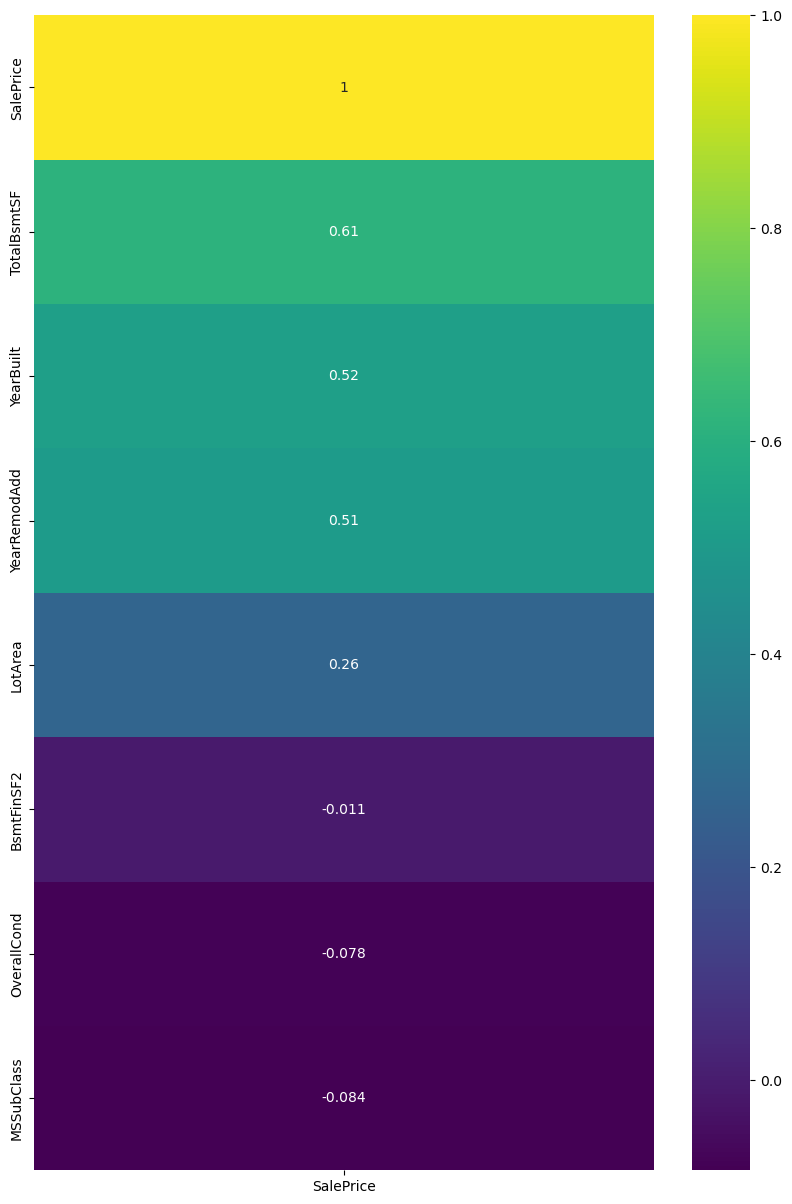

In [55]:
plt.figure(figsize=(10, 15))

#Plotting the heatmap with respect to the correlation of the features with the target variable 'SalePrice'-

sns.heatmap(data.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='viridis')

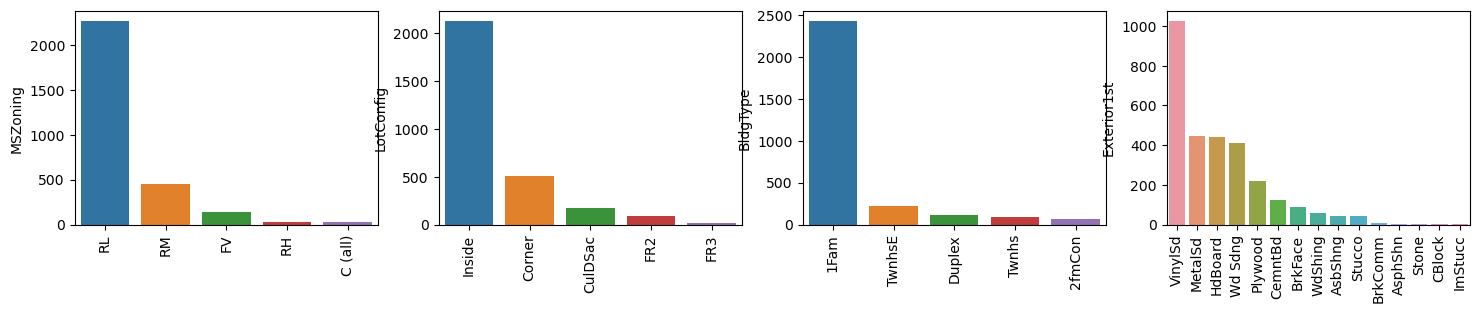

In [56]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = data[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

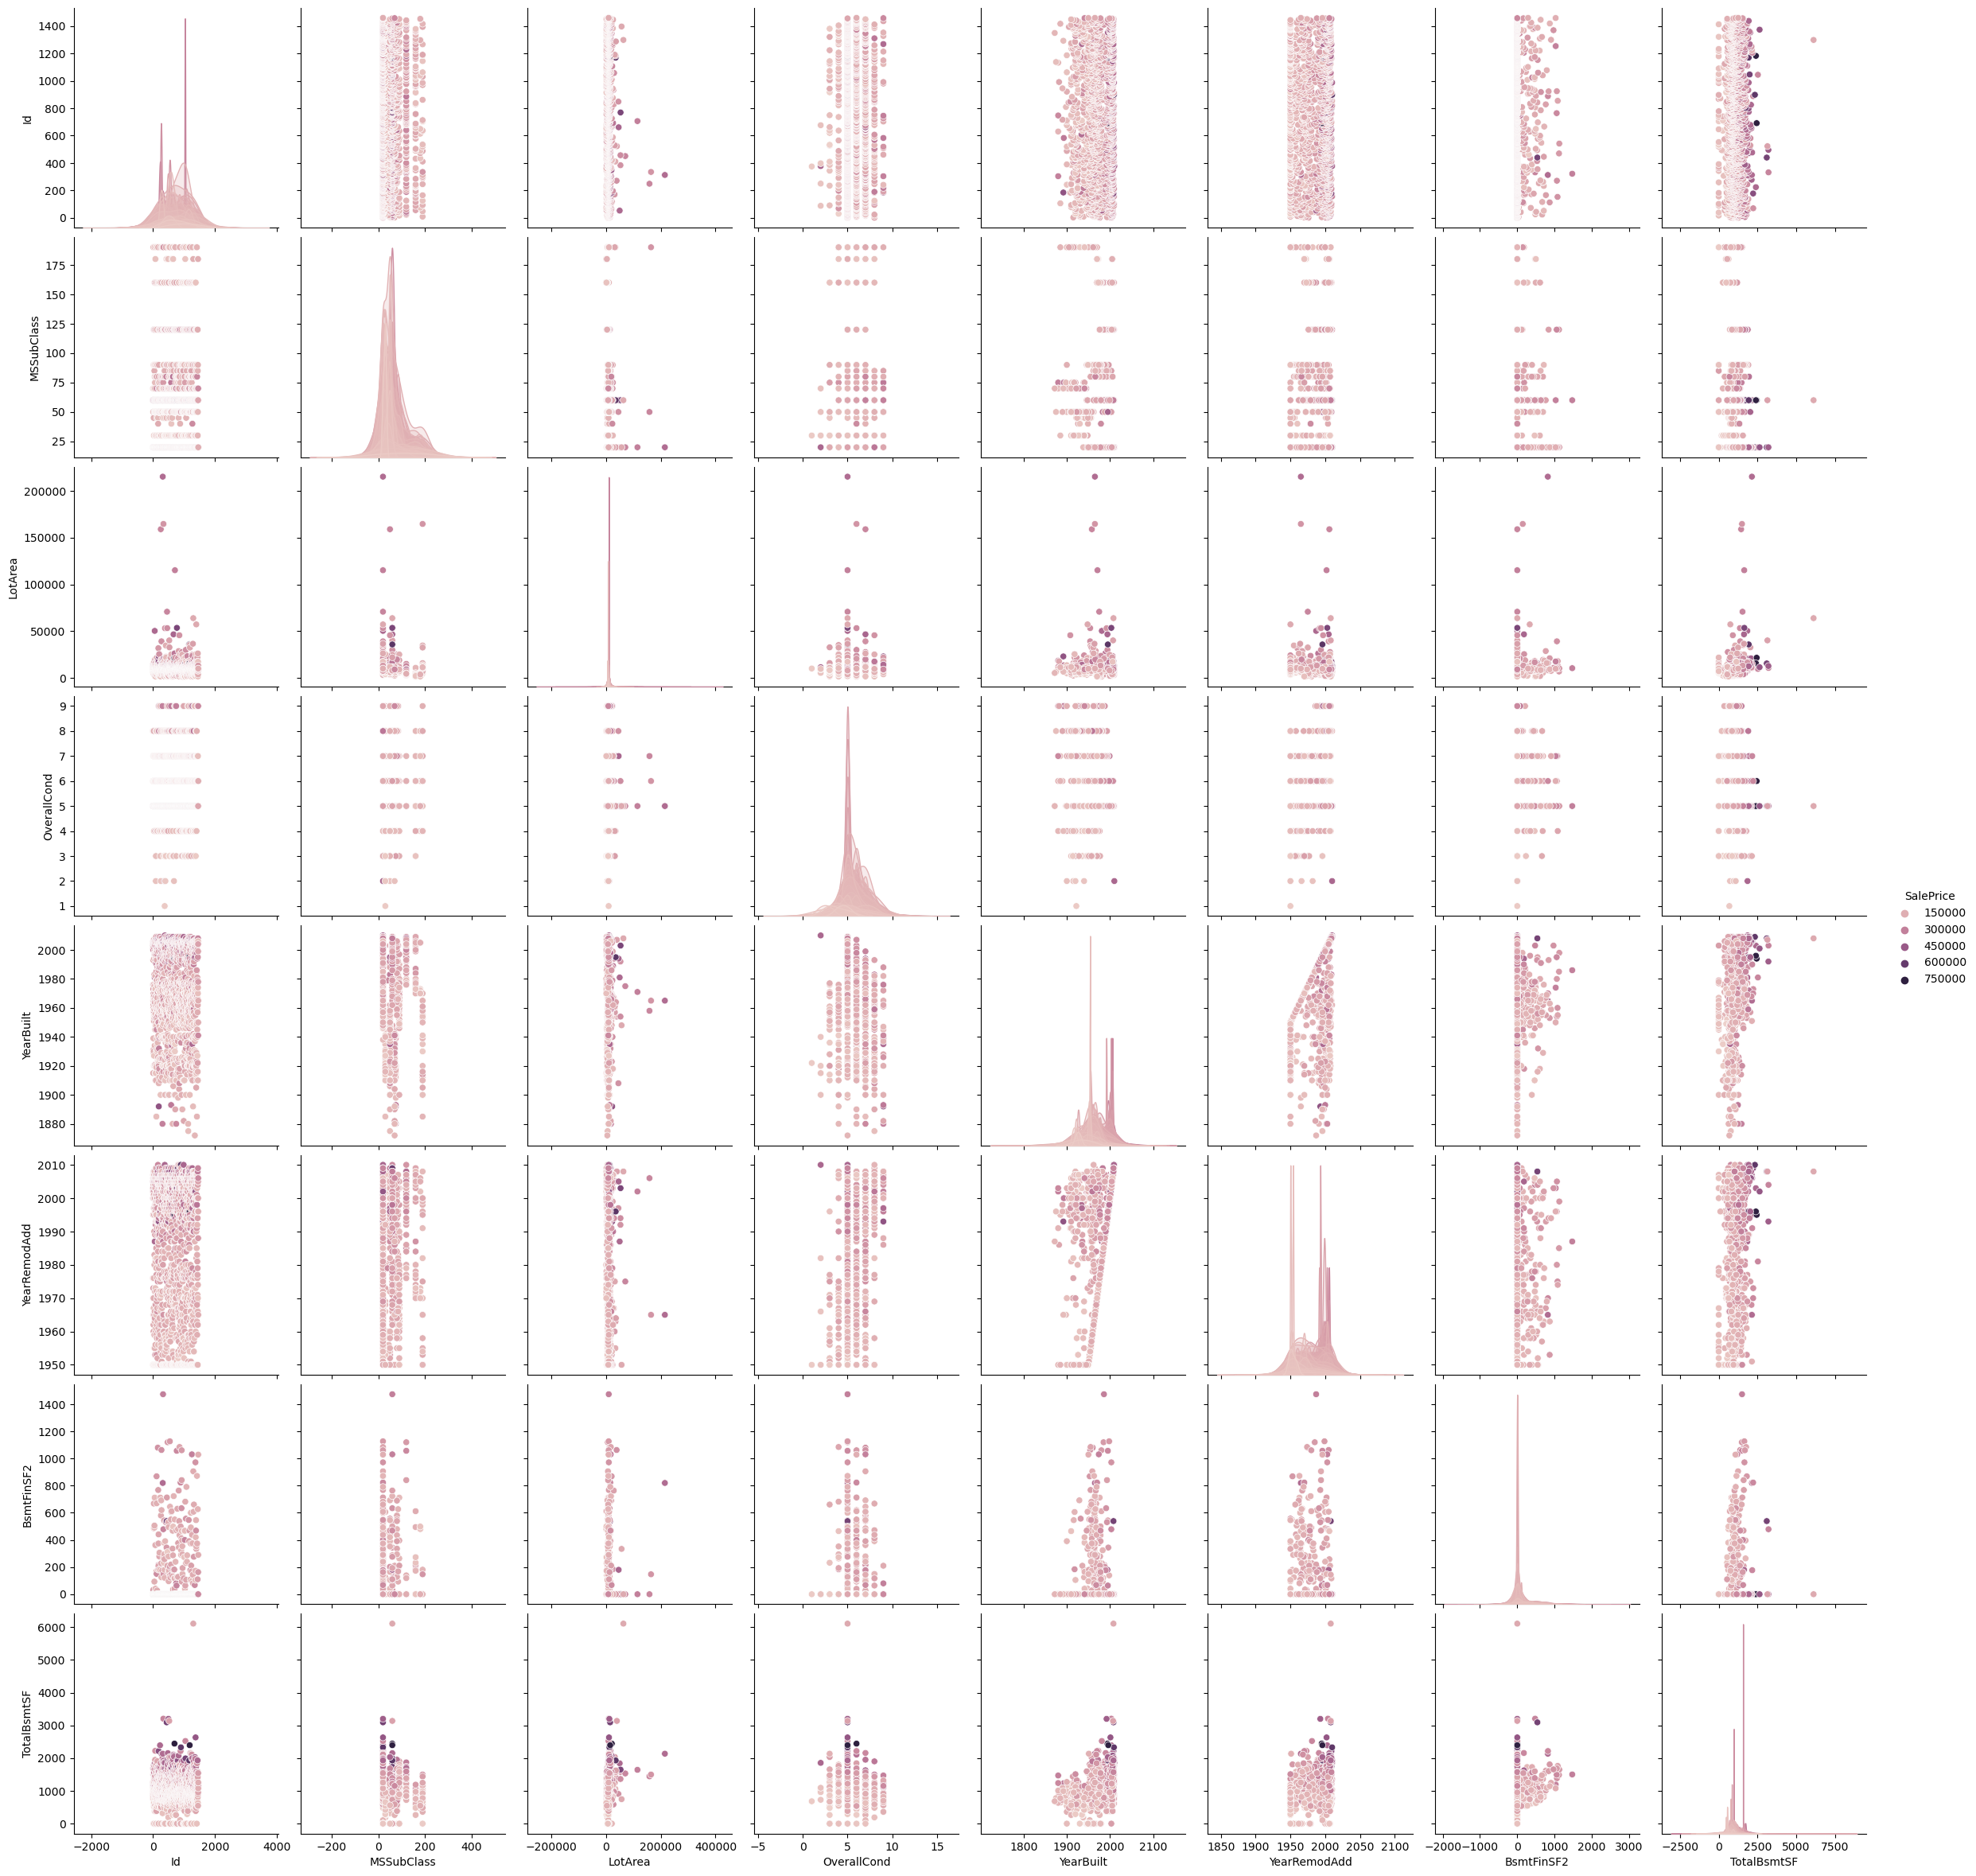

In [39]:
#Pairplot-

sns.pairplot(data, hue='SalePrice', height=3)
plt.show()

### Target Feature:

In [22]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [23]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Histogram(x=data['SalePrice']), row=1, col=1)
fig.add_trace(go.Box(y=data['SalePrice'], boxpoints='all', line_color='orange'), row=1, col=2)

fig.show()

### Correlation:

In [57]:
data.corr()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
MSSubClass,1.000000,-0.198605,-0.063332,0.030139,0.040268,-0.071398,-0.218393,-0.084284
LotArea,-0.198605,1.000000,-0.036750,0.025944,0.022917,0.083516,0.253637,0.263843
OverallCond,-0.063332,-0.036750,1.000000,-0.367879,0.048561,0.041112,-0.175248,-0.077856
YearBuilt,0.030139,0.025944,-0.367879,1.000000,0.611518,-0.026960,0.410342,0.522897
YearRemodAdd,0.040268,0.022917,0.048561,0.611518,1.000000,-0.061736,0.298730,0.507101
BsmtFinSF2,-0.071398,0.083516,0.041112,-0.026960,-0.061736,1.000000,0.089121,-0.011378
TotalBsmtSF,-0.218393,0.253637,-0.175248,0.410342,0.298730,0.089121,1.000000,0.613581
SalePrice,-0.084284,0.263843,-0.077856,0.522897,0.507101,-0.011378,0.613581,1.000000


<Axes: >

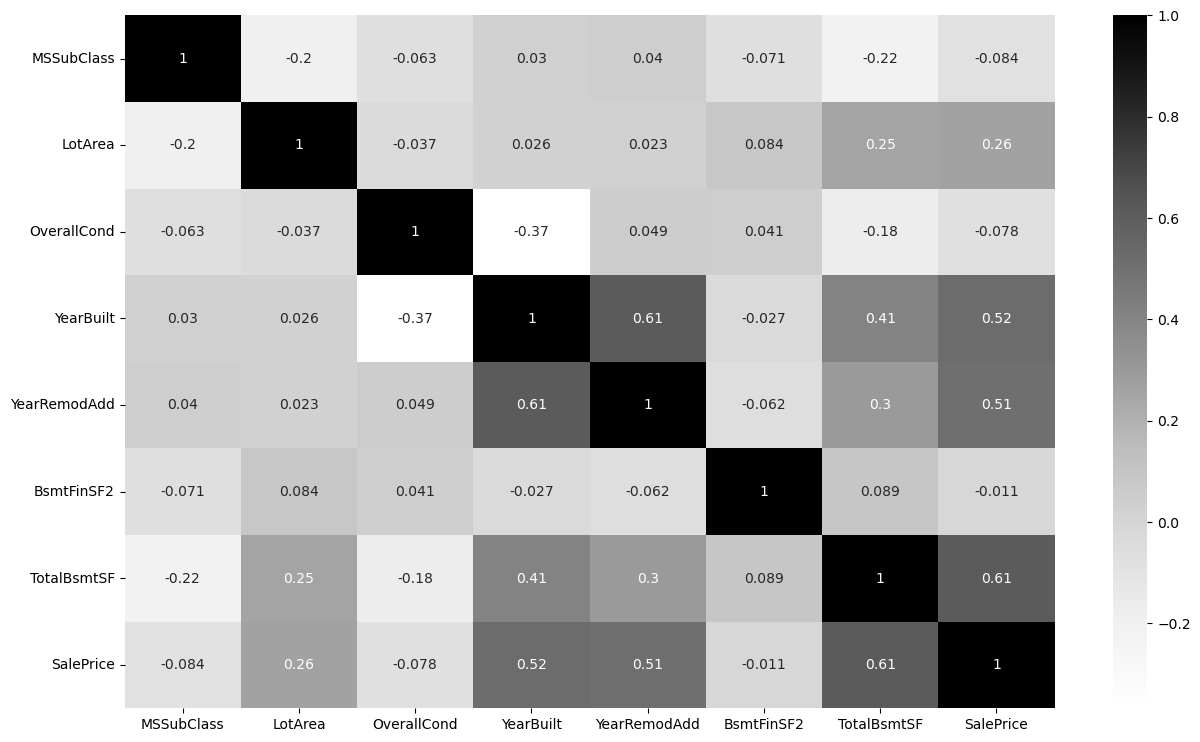

In [58]:
#Or -

fig = plt.figure(figsize=(15,9))
sns.heatmap(data.corr() ,cmap='Greys', annot = True)

### Replacing SalePrice empty values with their mean values to make the data distribution symmetric:

In [59]:
data['SalePrice'] = data['SalePrice'].fillna(data['SalePrice'].mean())

In [60]:
new_dataset = data.dropna()

In [61]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

### OneHotEncoder – For Label categorical features:

#### One hot Encoding is the best way to convert categorical data into binary vectors. This maps the values to integer values. By using OneHotEncoder, we can easily convert object data into int. So for that, firstly we have to collect all the features which have the object datatype. To do so, we will make a loop.

In [64]:
from sklearn.preprocessing import OneHotEncoder
 
s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [66]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out(input_features=object_cols)
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [68]:
print(df_final)

      MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
0             60     8450            5       2003          2003         0.0   
1             20     9600            8       1976          1976         0.0   
2             60    11250            5       2001          2002         0.0   
3             70     9550            5       1915          1970         0.0   
4             60    14260            5       2000          2000         0.0   
...          ...      ...          ...        ...           ...         ...   
2914         160     1936            7       1970          1970         0.0   
2915         160     1894            5       1970          1970         0.0   
2916          20    20000            7       1960          1996         0.0   
2917          85    10441            5       1992          1992         0.0   
2918          60     9627            5       1993          1994         0.0   

      TotalBsmtSF     SalePrice  MSZoning_C (all)  

### Splitting Dataset into Training and Testing:

In [69]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
 
X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

In [70]:
# Split the training set into training and validation set-

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [71]:
print(X_train)
print(X_valid)
print(Y_train)
print(Y_valid)

      MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
2641         120     8773            5       2002          2002         0.0   
188           90     7018            5       1979          1979         0.0   
900           20     7340            6       1971          1971         0.0   
2076          20     8000            6       1959          1959       488.0   
2407          20     8250            7       1963          1963         0.0   
...          ...      ...          ...        ...           ...         ...   
763           60     9430            5       1999          1999         0.0   
835           20     9600            7       1950          1995         0.0   
1653         160     2308            5       1976          1976         0.0   
2617          20    39384            6       1957          1957         0.0   
2743          20    10152            6       1956          1994         0.0   

      TotalBsmtSF  MSZoning_C (all)  MSZoning_FV  M

In [72]:
print(X_train.shape)
print(X_valid.shape)
print(Y_train.shape)
print(Y_valid.shape)

(2324, 37)
(581, 37)
(2324,)
(581,)


### Model and Accuracy:

#### 1.) Using Random Forest-

#### Random Forest is an ensemble technique that uses multiple of decision trees and can be used for both regression and classification tasks. 

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
 
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
 
mean_absolute_percentage_error(Y_valid, Y_pred)

0.1936546894998413

#### 2.) SVM – Support vector Machine-

#### SVM can be used for both regression and classification model. It finds the hyperplane in the n-dimensional plane.

In [74]:
from sklearn import svm
from sklearn.svm import SVC
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.16441156113077807


#### 3.) Linear Regression-

#### Linear Regression predicts the final output-dependent value based on the given independent features. Like, here we have to predict SalePrice depending on features like MSSubClass, YearBuilt, BldgType, Exterior1st etc.

In [75]:
from sklearn.linear_model import LinearRegression
 
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.18019476208682925


#### 4.) CatBoost Classifier- 

#### CatBoost is a machine learning algorithm implemented by Yandex and is open-source. It is simple to interface with deep learning frameworks such as Apple’s Core ML and Google’s TensorFlow. Performance, ease-of-use, and robustness are the main advantages of the CatBoost library.

In [77]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid)
 
cb_r2_score=r2_score(Y_valid, preds)
cb_r2_score

Learning rate set to 0.046778
0:	learn: 56919.6025906	total: 206ms	remaining: 3m 26s
1:	learn: 56102.8945142	total: 209ms	remaining: 1m 44s
2:	learn: 55431.3314334	total: 211ms	remaining: 1m 10s
3:	learn: 54681.9165105	total: 213ms	remaining: 52.9s
4:	learn: 54128.5089960	total: 214ms	remaining: 42.7s
5:	learn: 53558.8090790	total: 216ms	remaining: 35.8s
6:	learn: 53036.6156443	total: 218ms	remaining: 30.9s
7:	learn: 52588.4299672	total: 220ms	remaining: 27.2s
8:	learn: 52039.7527678	total: 221ms	remaining: 24.4s
9:	learn: 51508.4076684	total: 223ms	remaining: 22.1s
10:	learn: 51000.4470108	total: 225ms	remaining: 20.2s
11:	learn: 50633.6871542	total: 227ms	remaining: 18.7s
12:	learn: 50228.1830420	total: 229ms	remaining: 17.4s
13:	learn: 49899.9181899	total: 230ms	remaining: 16.2s
14:	learn: 49585.8385288	total: 232ms	remaining: 15.3s
15:	learn: 49272.5779682	total: 234ms	remaining: 14.4s
16:	learn: 48911.0531180	total: 236ms	remaining: 13.6s
17:	learn: 48579.6832552	total: 237ms	rema

193:	learn: 36318.7984705	total: 601ms	remaining: 2.5s
194:	learn: 36287.9417897	total: 604ms	remaining: 2.49s
195:	learn: 36272.4345712	total: 606ms	remaining: 2.48s
196:	learn: 36262.4858047	total: 608ms	remaining: 2.48s
197:	learn: 36235.5840256	total: 610ms	remaining: 2.47s
198:	learn: 36232.5206213	total: 612ms	remaining: 2.46s
199:	learn: 36210.5809554	total: 614ms	remaining: 2.46s
200:	learn: 36186.3575297	total: 617ms	remaining: 2.45s
201:	learn: 36163.8186566	total: 620ms	remaining: 2.45s
202:	learn: 36137.8275658	total: 622ms	remaining: 2.44s
203:	learn: 36123.9659031	total: 624ms	remaining: 2.43s
204:	learn: 36119.3320298	total: 626ms	remaining: 2.43s
205:	learn: 36095.5172692	total: 628ms	remaining: 2.42s
206:	learn: 36068.6364256	total: 630ms	remaining: 2.41s
207:	learn: 36048.1948591	total: 632ms	remaining: 2.41s
208:	learn: 35974.3835732	total: 635ms	remaining: 2.4s
209:	learn: 35922.0930488	total: 637ms	remaining: 2.4s
210:	learn: 35912.5012701	total: 639ms	remaining: 2

351:	learn: 32973.8708496	total: 997ms	remaining: 1.83s
352:	learn: 32956.1717264	total: 1000ms	remaining: 1.83s
353:	learn: 32913.0159187	total: 1s	remaining: 1.83s
354:	learn: 32873.1304106	total: 1s	remaining: 1.83s
355:	learn: 32859.2229630	total: 1.01s	remaining: 1.82s
356:	learn: 32826.5650003	total: 1.01s	remaining: 1.82s
357:	learn: 32812.3261639	total: 1.01s	remaining: 1.82s
358:	learn: 32810.6307344	total: 1.01s	remaining: 1.81s
359:	learn: 32784.2595690	total: 1.02s	remaining: 1.81s
360:	learn: 32766.9717679	total: 1.02s	remaining: 1.81s
361:	learn: 32716.6100818	total: 1.02s	remaining: 1.8s
362:	learn: 32698.6557786	total: 1.02s	remaining: 1.8s
363:	learn: 32678.3023161	total: 1.03s	remaining: 1.8s
364:	learn: 32670.2440628	total: 1.03s	remaining: 1.79s
365:	learn: 32655.7127605	total: 1.03s	remaining: 1.79s
366:	learn: 32631.5432623	total: 1.04s	remaining: 1.79s
367:	learn: 32591.9138300	total: 1.04s	remaining: 1.79s
368:	learn: 32567.1934303	total: 1.04s	remaining: 1.78s


499:	learn: 30278.2449641	total: 1.37s	remaining: 1.37s
500:	learn: 30250.4409653	total: 1.37s	remaining: 1.37s
501:	learn: 30241.3292470	total: 1.38s	remaining: 1.36s
502:	learn: 30216.5764941	total: 1.38s	remaining: 1.36s
503:	learn: 30211.2367818	total: 1.38s	remaining: 1.36s
504:	learn: 30201.6845925	total: 1.38s	remaining: 1.35s
505:	learn: 30190.9097956	total: 1.39s	remaining: 1.35s
506:	learn: 30185.6461861	total: 1.39s	remaining: 1.35s
507:	learn: 30169.0683085	total: 1.39s	remaining: 1.35s
508:	learn: 30154.4492309	total: 1.4s	remaining: 1.34s
509:	learn: 30142.1480041	total: 1.4s	remaining: 1.34s
510:	learn: 30124.6621670	total: 1.4s	remaining: 1.34s
511:	learn: 30119.7894168	total: 1.4s	remaining: 1.34s
512:	learn: 30097.4207882	total: 1.4s	remaining: 1.33s
513:	learn: 30085.5652913	total: 1.41s	remaining: 1.33s
514:	learn: 30076.7691086	total: 1.41s	remaining: 1.33s
515:	learn: 30075.6682011	total: 1.41s	remaining: 1.32s
516:	learn: 30057.4145341	total: 1.41s	remaining: 1.3

708:	learn: 27483.2843192	total: 1.96s	remaining: 804ms
709:	learn: 27466.0475899	total: 1.96s	remaining: 801ms
710:	learn: 27452.4090969	total: 1.96s	remaining: 798ms
711:	learn: 27444.3049572	total: 1.97s	remaining: 795ms
712:	learn: 27420.1669949	total: 1.97s	remaining: 792ms
713:	learn: 27410.1569702	total: 1.97s	remaining: 789ms
714:	learn: 27397.3260571	total: 1.97s	remaining: 787ms
715:	learn: 27387.0059567	total: 1.98s	remaining: 784ms
716:	learn: 27374.9915845	total: 1.98s	remaining: 781ms
717:	learn: 27366.2800916	total: 1.98s	remaining: 778ms
718:	learn: 27351.0045852	total: 1.98s	remaining: 775ms
719:	learn: 27330.1669679	total: 1.99s	remaining: 773ms
720:	learn: 27324.8093182	total: 1.99s	remaining: 770ms
721:	learn: 27323.8696073	total: 1.99s	remaining: 767ms
722:	learn: 27301.7455875	total: 1.99s	remaining: 764ms
723:	learn: 27293.3597586	total: 2s	remaining: 762ms
724:	learn: 27270.0423580	total: 2s	remaining: 759ms
725:	learn: 27262.9353695	total: 2s	remaining: 756ms
7

860:	learn: 25724.0549489	total: 2.34s	remaining: 378ms
861:	learn: 25717.4678866	total: 2.34s	remaining: 375ms
862:	learn: 25703.4698155	total: 2.35s	remaining: 373ms
863:	learn: 25694.3634881	total: 2.35s	remaining: 370ms
864:	learn: 25685.0783673	total: 2.35s	remaining: 367ms
865:	learn: 25675.2057797	total: 2.35s	remaining: 364ms
866:	learn: 25667.2794466	total: 2.36s	remaining: 362ms
867:	learn: 25663.7814103	total: 2.36s	remaining: 359ms
868:	learn: 25655.7761302	total: 2.36s	remaining: 356ms
869:	learn: 25647.2240330	total: 2.37s	remaining: 353ms
870:	learn: 25634.7132521	total: 2.37s	remaining: 351ms
871:	learn: 25624.2161802	total: 2.37s	remaining: 348ms
872:	learn: 25614.3517469	total: 2.37s	remaining: 345ms
873:	learn: 25601.9562084	total: 2.38s	remaining: 342ms
874:	learn: 25586.4131805	total: 2.38s	remaining: 340ms
875:	learn: 25578.0351729	total: 2.38s	remaining: 337ms
876:	learn: 25567.4662772	total: 2.38s	remaining: 334ms
877:	learn: 25559.4331525	total: 2.38s	remaining

0.2883706402069921

#### Clearly, Linear Regression model is giving better accuracy as the mean absolute error is the least among all the other regressor models i.e. 0.18 approx.